In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing

## Data Overview

In [3]:
data_movies = pd.read_csv('movies.csv')
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data_ratings = pd.read_csv('ratings.csv')
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
data_tags = pd.read_csv('tags.csv')
data_tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
data_ratings = data_ratings.drop(['timestamp'], axis=1)
data_tags = data_tags.drop(['timestamp'], axis=1)

In [10]:
data_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
data_tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


## General Recommendation

In [24]:
#Rating sheet of each movie
movies_rating = data_movies.merge(data_ratings).groupby(['movieId','title'])['rating'].mean().reset_index().merge(data_movies)
movies_rating.head()

,movieId,title,rating,genres
0,1,Toy Story (1995),3.920930,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),3.431818,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),3.259615,Comedy|Romance
3,4,Waiting to Exhale (1995),2.357143,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),3.071429,Comedy


In [30]:
#The highest rating movies
movies_rating[movies_rating['rating'] >= 4.0].sort_values(by = ['rating']).tail()

,movieId,title,rating,genres
8916,136353,Scooby-Doo! and the Loch Ness Monster (2004),5.0,Animation|Children|Comedy
8915,136341,Scooby-Doo! and the Samurai Sword (2009),5.0,Animation|Children|Comedy
5771,31522,"Marriage of Maria Braun, The (Ehe der Maria Br...",5.0,Drama
8928,136556,Kung Fu Panda: Secrets of the Masters (2011),5.0,Animation|Children
3802,5328,Rain (2001),5.0,Drama|Romance


## Clustering

In [62]:
data = movies_rating.copy()

In [63]:
data.head()

,movieId,title,rating,genres
0,1,Toy Story (1995),3.920930,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),3.431818,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),3.259615,Comedy|Romance
3,4,Waiting to Exhale (1995),2.357143,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),3.071429,Comedy


In [67]:
genres = pd.DataFrame(data['genres'].str.split('|').tolist()).stack().unique()
genres = pd.DataFrame(genres, columns=['genre'])
data = data.join(data.genres.str.get_dummies()).drop('genres', axis=1).drop('(no genres listed)', axis=1)
data.head()

,movieId,title,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.920930,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.431818,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = data.drop('title', axis=1)
X.head()

,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.920930,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.431818,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.259615,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2.357143,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,3.071429,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## KMeans

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=61, n_jobs=-1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=61, tol=0.0001, verbose=0)

In [73]:
clusters = kmeans.predict(X)
clusters

array([9, 9, 9, ..., 0, 0, 0], dtype=int32)

In [75]:
data['cluster'] = clusters
data

,movieId,title,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,1,Toy Story (1995),3.920930,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,9
1,2,Jumanji (1995),3.431818,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,9
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,9
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
5,6,Heat (1995),3.946078,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,9
6,7,Sabrina (1995),3.185185,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,9
7,8,Tom and Huck (1995),2.875000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
8,9,Sudden Death (1995),3.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9,10,GoldenEye (1995),3.496212,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,9


/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


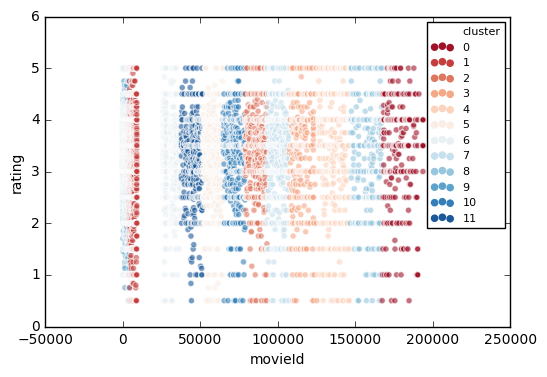

In [78]:
sns.scatterplot(x="movieId", y="rating", hue='cluster', palette=sns.color_palette("RdBu", n_colors=12), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()